**Введение**

В современном мире технологий возрастает потребность в автоматизации обработки и анализа визуальной информации, включая текст, содержащийся на изображениях и документах. Распознавание текста на изображениях является ключевой задачей в области компьютерного зрения, которая находит применение в самых разных сферах, от автоматизированного ввода данных до помощи людям с ограниченными возможностями.

***Целью*** данной курсовой работы является разработка и сравнение различных моделей машинного обучения для распознавания текста на изображениях. Основная задача — определить наиболее эффективную модель, способную точно и эффективно классифицировать изображения по заданным категориям.

В рамках работы были рассмотрены разные подходы к обработке изображений, включая сверточные нейронные сети (CNN) и рекуррентные нейронные сети (LSTM), которые были обучены, протестированы и сравнены на одном и том же наборе данных. Исследование позволило не только сравнить эффективность различных архитектур нейронных сетей, но и выявить наиболее важные факторы, влияющие на производительность моделей в задачах распознавания текста.

**Выбор датасета**

Для проведения исследования был выбран датасет "Russian Handwritten Letters", доступный на платформе Kaggle.

Выбор этого набора данных обусловлен несколькими ключевыми факторами:

* Открытость данных: Датасет доступен для свободного использования, что позволяет проводить эксперименты без ограничений по лицензированию и других юридических аспектах.
* Объём данных: Набор содержит достаточное количество изображений для обучения и тестирования моделей, что критически важно для получения статистически значимых результатов.
* Разнообразие образцов: Датасет включает изображения, написанные различными людьми, что добавляет вариативности и помогает обучить модель, способную эффективно работать с разнообразными стилями рукописного текста.
* Предварительная аннотация: Все изображения уже размечены, что ускоряет процесс подготовки данных к обучению и позволяет сосредоточиться непосредственно на процессе разработки и тестирования моделей.
* Подходящий формат данных: Изображения представлены в удобном для обработки формате, что упрощает их интеграцию в процессы предварительной обработки и обучения моделей.

Эти факторы обеспечивают качественную основу для проведения научных исследований в области распознавания рукописного текста и позволяют рассчитывать на получение объективных и проверяемых результатов.

<hr>

**Импорт необходимых библиотек**

В начале работы над проектом особое внимание было уделено подготовке рабочего пространства для обработки данных и построения моделей машинного обучения. Для этого были импортированы ключевые библиотеки:

* Numpy — эта библиотека используется для работы с массивами данных. Она необходима для операций с матрицами и массивами, что крайне важно при работе с изображениями, так как каждое изображение можно представить в виде массива пикселей.
* Pandas — обеспечивает удобную работу с табличными данными. В проекте она используется для загрузки и манипуляции данными из CSV-файла, который содержит метаданные об изображениях.
* TensorFlow и Keras — эти библиотеки предоставляют инструменты для создания, тренировки и тестирования нейронных сетей. TensorFlow служит основой, предоставляя комплексные возможности для машинного обучения, а Keras предлагает более высокоуровневый, удобный интерфейс для более быстрой разработки моделей.
* PIL (Python Imaging Library) — используется для открытия и обработки изображений. В данном проекте она помогает в загрузке изображений, их трансформации (изменении размера и конвертации в градации серого), что необходимо для подготовки данных к обработке нейронной сетью.
* Matplotlib и Seaborn — эти библиотеки предназначены для визуализации данных. Matplotlib используется для базовых графиков, а Seaborn — для более сложных статистических визуализаций. В контексте данного проекта они помогают в анализе данных, визуализируя, например, распределение классов изображений, что важно для понимания структуры данных и дальнейшей корректировки процесса обучения модели.

Эти библиотеки были выбраны не случайно, так как каждая из них играет важную роль в различных аспектах работы над проектом, от предобработки данных до построения и оценки эффективности моделей машинного обучения.

In [1]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import LSTM, Dense, Reshape
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns


**Загрузка и предобработка данных**

На этом этапе была проведена работа по загрузке и начальной обработке данных, необходимых для обучения модели. Основные действия включали следующие процессы:

*Загрузка данных*

С помощью библиотеки Pandas были загружены данные из CSV-файла, который содержит информацию о путях к изображениям и их метках (классы символов). Пример строки из этого файла: path/to/image.jpg, A. Это позволило организовать данные таким образом, чтобы удобно было работать с изображениями и соответствующими им метками.

*Предобработка изображений*

Для каждого изображения были выполнены следующие шаги предобработки:

1. Загрузка изображения: Используя библиотеку PIL, изображение загружалось с диска.
2. Изменение размера и преобразование: Изображение приводилось к единому стандартному размеру (28x28 пикселей), что необходимо для унификации входных данных модели. Кроме того, изображение конвертировалось в градации серого, что уменьшает размер входных данных и упрощает задачу для нейронной сети.
3. Нормализация: Пиксельные значения изображения были нормализованы путем деления на 255. Это приводит значения пикселей к диапазону [0, 1], что помогает в улучшении процесса обучения, так как меньшие и нормализованные значения обычно обеспечивают более стабильную и быструю сходимость в процессе обучения.

В результате этих шагов был создан массив изображений в виде многомерного массива Numpy, где каждый элемент массива — это нормализованное изображение размером 28x28 пикселей. Эти изображения готовы к использованию в моделях машинного обучения.

*Метки классов*

Метки классов были преобразованы из категориальной формы в числовую, где каждому уникальному символу соответствует уникальное число. Это необходимо для корректной работы алгоритмов машинного обучения, которые работают с числовыми данными.

Эти шаги предобработки критически важны, так как качество и точность модели машинного обучения напрямую зависят от того, насколько хорошо подготовлены данные.

In [22]:
data_path = 'all_letters_info.csv'
data = pd.read_csv(data_path)
images_folder = 'all_letters_image/'

images = []
labels = []

for idx, row in data.iterrows():
    image_path = os.path.join(images_folder, row['file'])
    image = Image.open(image_path)
    image = image.resize((28, 28), Image.Resampling.LANCZOS).convert('L')
    image_array = np.array(image) / 255.0 
    images.append(image_array)
    labels.append(row['label'])

images = np.array(images).reshape(-1, 28, 28, 1)
labels = np.array(labels)

**Визуализация и проверка данных**

После загрузки и предобработки данных следующим шагом стала визуализация распределения классов и проверка на наличие пропущенных значений, что помогло оценить качество и пригодность данных для дальнейшего обучения модели.

*Визуализация распределения классов*

С помощью библиотеки Seaborn был построен график количества изображений по каждому классу (метке). Это позволило визуально оценить, равномерно ли распределены данные по различным классам. Неравномерное распределение может привести к тому, что модель будет лучше распознавать те классы, которые представлены в большем количестве, и хуже — те, что представлены меньшим количеством образцов. Такая визуализация помогает определить, нужно ли применять методы балансировки классов, например, путем аугментации данных или взвешивания классов в функции потерь.

*Проверка на пропущенные значения*

Была выполнена проверка данных на наличие пропущенных значений с использованием функциональности библиотеки Pandas. Пропущенные значения могут возникнуть из-за ошибок в данных или в процессе их загрузки и могут серьезно повлиять на процесс обучения, ведь модель не сможет корректно обрабатывать неполные данные. Если были найдены пропущенные значения, необходимо было бы принять меры для их обработки, например, заменив их на средние значения или удалив соответствующие строки или столбцы.

Эти шаги визуализации и проверки данных являются важной частью предварительного анализа, так как они помогают убедиться, что данные готовы к обучению модели, и исключить возможные источники ошибок на более поздних этапах процесса машинного обучения.

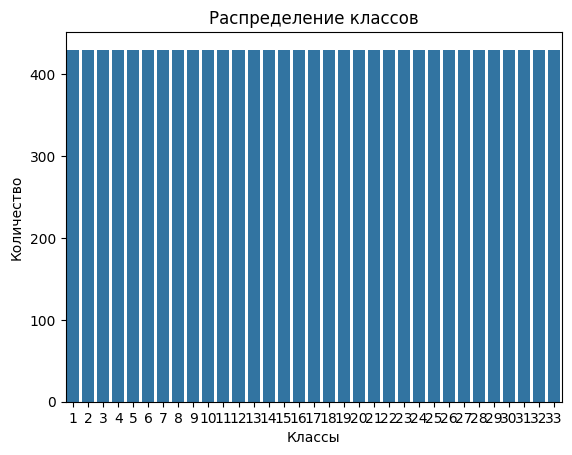

Пропущенных значений нет.


In [25]:
labels_series = pd.Series(labels)
sns.countplot(x=labels_series)
plt.title('Распределение классов')
plt.xlabel('Классы')
plt.ylabel('Количество')
plt.show()


if data.isnull().any().any():
    print("В данных есть пропущенные значения.")
else:
    print("Пропущенных значений нет.")

**Разделение данных на обучающую и тестовую выборки**

Для оценки эффективности и обобщающей способности обученной модели необходимо разделить доступные данные на обучающую и тестовую выборки. Это разделение позволяет проверить, как модель будет работать с новыми данными, которые она не видела в процессе обучения.

*Процесс разделения данных*

Используя функцию train_test_split из библиотеки scikit-learn, данные были разделены в соотношении 80% на обучающую выборку и 20% на тестовую. Это стандартное разделение, которое обычно используется для тестирования моделей машинного обучения. Обучающая выборка используется для тренировки модели, в то время как тестовая выборка используется для проверки её способности корректно работать с данными, которые не участвовали в обучении.

*Значение случайного состояния (random_state)*

Параметр random_state в функции train_test_split обеспечивает воспроизводимость результатов. Установка этого параметра гарантирует, что при каждом выполнении кода разделение данных будет происходить одинаково, что важно для сравнительного анализа результатов модели при различных условиях обучения.

*Важность разделения данных*

Разделение данных на обучающую и тестовую выборки критически важно для оценки модели, так как предоставляет объективную информацию о её работе с невидимыми ранее данными. Это позволяет обнаружить такие проблемы, как переобучение — состояние, при котором модель идеально работает на обучающей выборке, но плохо справляется с новыми данными. Использование отдельной тестовой выборки помогает убедиться, что модель обладает хорошей обобщающей способностью и будет работать эффективно в реальных условиях.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

**Создание и обучение нейронной сети**

После того как данные были подготовлены и разделены, следующий шаг — создание и обучение модели нейронной сети. Цель этого этапа — построить архитектуру нейронной сети, которая эффективно справится с задачей классификации изображений.

*Описание архитектуры модели*

В данном случае была выбрана архитектура сверточной нейронной сети (CNN), которая является стандартом де-факто для задач распознавания изображений. Сверточные нейронные сети хорошо работают с изображениями за счет использования сверточных слоев, которые эффективно обрабатывают 
пространственные иерархии характеристик визуальных данных.

Модель состояла из следующих слоев:

1. Сверточный слой (Conv2D): Использует фильтры для извлечения признаков из изображения.
2. Слой подвыборки (MaxPooling2D): Уменьшает размерность данных, сохраняя при этом важные признаки.
3. Полносвязные слои (Dense): Используются для классификации на основе извлеченных признаков.
3. Dropout: Слой, который помогает предотвратить переобучение путем случайного исключения некоторых нейронов из обучения во время каждой итерации.

*Процесс обучения*

Модель обучалась с использованием следующих параметров:

* Оптимизатор: Adam — популярный выбор для тренировки нейронных сетей, так как он адаптивно корректирует скорость обучения для каждого параметра.
* Функция потерь: sparse_categorical_crossentropy — подходит для мультиклассовой классификации, когда метки классов представлены в виде целых чисел.
* Метрика: точность (accuracy) — показывает долю правильно классифицированных образцов.
* Модель тренировалась в течение нескольких эпох, где каждая эпоха включала проход по всем образцам обучающей выборки с последующим тестированием на валидационном наборе данных. Это позволило наблюдать за прогрессом обучения и корректировать параметры в случае необходимости для достижения лучшей точности.

*Важность выбора и настройки архитектуры*

Выбор и тщательная настройка архитектуры модели являются ключевыми аспектами успешного обучения. Ошибки в архитектуре или параметрах обучения могут привести к недостаточной эффективности модели, что проявляется в низкой точности и/или переобучении. Поэтому критически важно проводить эксперименты с различными конфигурациями и тестировать их на валидационных данных, чтобы выбрать наиболее оптимальную модель.

In [7]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(34, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

first_model = create_model()
first_model.summary()

history = first_model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=64,
    validation_split=0.3
)
first_model.save('my_model_first_CNN.h5')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 34)             │         4,386 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 228,130 (891.13 KB)

 Trainable params: 228,130 (891.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0301 - loss: 3.5266 - val_accuracy: 0.0346 - val_loss: 3.4983
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0444 - loss: 3.4735 - val_accuracy: 0.0684 - val_loss: 3.3795
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0638 - loss: 3.3876 - val_accuracy: 0.1603 - val_loss: 3.1478
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1213 - loss: 3.1497 - val_accuracy: 0.2413 - val_loss: 2.7807
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1830 - loss: 2.8742 - val_accuracy: 0.2877 - val_loss: 2.5568
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2159 - loss: 2.7365 - val_accuracy: 0.3359 - val_loss: 2.4265
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2612 - loss: 2.5974 - val_accuracy: 0.3826 - val_loss: 2.3105
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2870 - loss: 2.4815 - val_accuracy: 0.

**Разработка альтернативной модели нейронной сети**

На этом этапе была создана альтернативная архитектура нейронной сети для сравнения её эффективности с первоначальной моделью. Это позволяет определить, какие архитектурные решения наиболее эффективны для данной задачи.

*Описание альтернативной архитектуры*

Альтернативная модель также основывается на принципах сверточной нейронной сети, но с изменениями в размере и количестве сверточных фильтров и слоев. Архитектура включает в себя:


*Изменения по сравнению с первой моделью*

Эта модель была спроектирована с учётом потенциального уменьшения переобучения и ускорения обучения за счёт уменьшения количества параметров и слоёв по сравнению с первой моделью. Такие изменения могут помочь сделать модель более обобщающей, особенно когда доступное количество данных ограничено.

Такой подход с использованием альтернативных моделей позволяет не только проверить различные архитектурные и тренировочные стратегии, но и гарантировать, что выбранная модель будет оптимальной в данных условиях задачи и данных.

In [8]:
def create_alternative_model():
    model = Sequential([
        Conv2D(16, (5, 5), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(2, 2),
        Conv2D(32, (5, 5), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(34, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

alternative_model = create_alternative_model()
alternative_model.summary()

alternative_history = alternative_model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_split=0.3
)

alternative_model.save('my_alternative_model_CNN.h5')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 16)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,290 (188.63 KB)

 Trainable params: 48,290 (188.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0297 - loss: 3.5202 - val_accuracy: 0.0305 - val_loss: 3.5016
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0333 - loss: 3.4943 - val_accuracy: 0.0440 - val_loss: 3.4171
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0534 - loss: 3.4123 - val_accuracy: 0.0437 - val_loss: 3.4235
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0578 - loss: 3.3984 - val_accuracy: 0.0558 - val_loss: 3.3662
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0816 - loss: 3.3303 - val_accuracy: 0.1409 - val_loss: 3.0535
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1828 - loss: 2.9287 - val_accuracy: 0.2507 - val_loss: 2.6381
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2940 - loss: 2.5537 - val_accuracy: 0.3285 - val_loss: 2.4092
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3373 - loss: 2.3742 - val_accuracy: 0.

**Разработка модели на основе LSTM**

Для исследования возможностей различных типов нейронных сетей в контексте распознавания изображений, была разработана модель, использующая LSTM (Long Short-Term Memory) слои. LSTM — это форма рекуррентной нейронной сети (RNN), которая эффективно работает с последовательными данными и может улавливать долгосрочные зависимости в данных.

Модель включает в себя следующие ключевые элементы:

1. Слой преобразования: Вводные данные представляют собой изображения размером 28x28 пикселей. Поскольку LSTM обрабатывает данные в форме последовательностей, изображение необходимо преобразовать в последовательность 28 элементов (строк), каждый из которых содержит 28 пикселей.
2. LSTM слой: Обрабатывает входную последовательность пикселей, пытаясь уловить зависимости между строками изображения, что может быть полезно для распознавания структурированных текстов или символов.
3. Полносвязный слой (Dense): Используется для классификации на основе признаков, извлеченных LSTM слоем, с функцией активации softmax для мультиклассовой классификации на 34 класса.

*Обучение LSTM модели*

Процесс обучения модели с LSTM аналогичен процедуре обучения сверточных нейронных сетей, использующийся в этом проекте. Модель обучается на тех же обучающих данных с использованием оптимизатора Adam и функции потерь sparse_categorical_crossentropy. Однако важно отметить, что обучение LSTM моделей может потребовать больше времени из-за сложности в обработке последовательностей.

*Особенности и предполагаемые преимущества LSTM*

Использование LSTM может предложить уникальные преимущества в некоторых сценариях распознавания, особенно когда важно учитывать контекст или порядок следования элементов в изображении. Такие модели могут быть особенно полезны при распознавании рукописного текста или других задачах, где порядок и контекст играют ключевую роль.

In [10]:
def create_lstm_model():
    model = Sequential([
        Reshape((28, 28), input_shape=(28, 28)),
        LSTM(64),
        Dense(34, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

lstm_model = create_lstm_model()
lstm_model.summary()

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=60,
    batch_size=64,
    validation_split=0.3
)

lstm_model.save('my_lstm_model.h5')


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        23,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 34)             │         2,210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,018 (101.63 KB)

 Trainable params: 26,018 (101.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0307 - loss: 3.5238 - val_accuracy: 0.0464 - val_loss: 3.4469
Epoch 2/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0507 - loss: 3.4316 - val_accuracy: 0.0496 - val_loss: 3.4114
Epoch 3/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0527 - loss: 3.3954 - val_accuracy: 0.0546 - val_loss: 3.3966
Epoch 4/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0570 - loss: 3.3872 - val_accuracy: 0.0467 - val_loss: 3.3881
Epoch 5/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0526 - loss: 3.3864 - val_accuracy: 0.0537 - val_loss: 3.3835
Epoch 6/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0552 - loss: 3.3881 - val_accuracy: 0.0575 - val_loss: 3.3741
Epoch 7/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0578 - loss: 3.3770 - val_accuracy: 0.0499 - val_loss: 3.3735
Epoch 8/60
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0556 - loss: 3.3692 - val_accuracy: 0.

**Сравнение моделей и анализ результатов**

После обучения всех трех моделей (оригинальной CNN, альтернативной CNN и LSTM) следующий шаг заключается в их сравнении и анализе результатов. Это позволяет определить, какая из моделей наиболее эффективна для задачи распознавания изображений и какие архитектурные решения оказались наиболее успешными.
Этот шаг критически важен для успешной реализации проекта, так как позволяет не только выбрать наилучшую модель, но и понять, какие аспекты архитектуры или тренировочного процесса могут быть улучшены для достижения ещё более высоких результатов.

*Визуализация результатов*

Для наглядности и удобства сравнения производительности моделей использовались графики, показывающие изменения точности (accuracy) и потерь (loss) на валидационной выборке в течение обучения. Это позволило визуально оценить, как модели адаптируются к данным, насколько стабильно они обучаются, и есть ли признаки переобучения.

*Анализ точности и потерь*

1. Точность (Accuracy): Сравнение финальных значений точности на валидационной выборке дает понять, насколько хорошо каждая модель справляется с классификацией изображений. Высокая точность указывает на эффективность модели в распознавании правильных классов.
2. Потери (Loss): Анализ значений потерь помогает оценить, насколько хорошо модель минимизирует ошибку во время обучения. Меньшее значение потерь свидетельствует о том, что модель лучше справляется с задачей минимизации ошибок классификации.


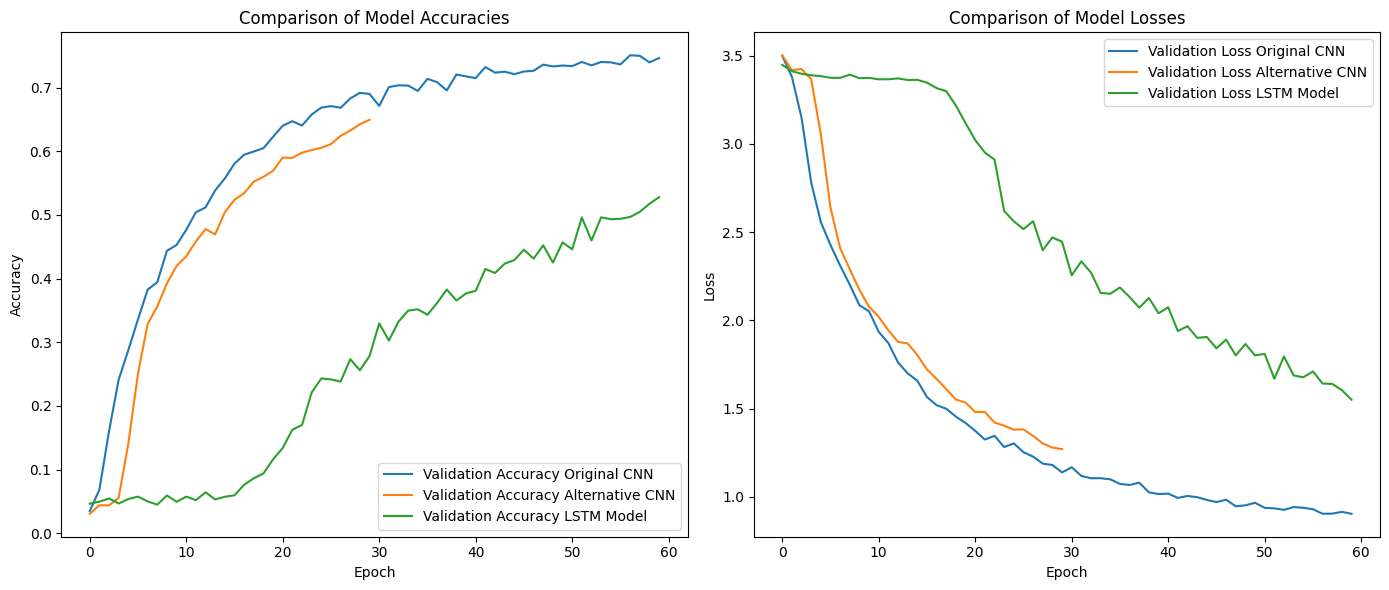

Original CNN - Final Validation Accuracy: 0.7463, Final Validation Loss: 0.9042
Alternative CNN - Final Validation Accuracy: 0.6494, Final Validation Loss: 1.2708
LSTM Model - Final Validation Accuracy: 0.5279, Final Validation Loss: 1.5507


In [11]:
def compare_three_models_and_print_results(history1, history2, history3, title1='Model 1', title2='Model 2', title3='Model 3'):
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(history1.history['val_accuracy'], label='Validation Accuracy ' + title1)
    plt.plot(history2.history['val_accuracy'], label='Validation Accuracy ' + title2)
    plt.plot(history3.history['val_accuracy'], label='Validation Accuracy ' + title3)
    plt.title('Comparison of Model Accuracies')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(history1.history['val_loss'], label='Validation Loss ' + title1)
    plt.plot(history2.history['val_loss'], label='Validation Loss ' + title2)
    plt.plot(history3.history['val_loss'], label='Validation Loss ' + title3)
    plt.title('Comparison of Model Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()
    print(f"{title1} - Final Validation Accuracy: {history1.history['val_accuracy'][-1]:.4f}, Final Validation Loss: {history1.history['val_loss'][-1]:.4f}")
    print(f"{title2} - Final Validation Accuracy: {history2.history['val_accuracy'][-1]:.4f}, Final Validation Loss: {history2.history['val_loss'][-1]:.4f}")
    print(f"{title3} - Final Validation Accuracy: {history3.history['val_accuracy'][-1]:.4f}, Final Validation Loss: {history3.history['val_loss'][-1]:.4f}")
compare_three_models_and_print_results(history, alternative_history, lstm_history, title1='Original CNN', title2='Alternative CNN', title3='LSTM Model')


*Выводы и выбор модели*

CNN модели обычно предпочтительнее для обработки изображений из-за их способности эффективно извлекать пространственные признаки. Именно поэтому на графиках мы видим, что при обучении CNN модели обладают большей точностью и меньшими потерями, ещё можно отметить что скорость обучения для обработки текста у CNN моделей выше.

LSTM модели могут показывать лучшие результаты в задачах, где важен контекст или последовательность данных, но могут быть менее эффективными для стандартных задач распознавания изображений из-за более высокой сложности и времени обучения.

**Применение модели и демонстрация результатов**

Последний этап проекта — применение обученной модели для распознавания новых изображений и демонстрация её способности к классификации на практических примерах. Это не только позволяет проверить реальную работоспособность модели, но и продемонстрировать её потенциал для решения прикладных задач.

*Загрузка и предобработка нового изображения*

Для тестирования модели была разработана функция load_and_preprocess_image, которая загружает изображение, изменяет его размер до 28x28 пикселей, конвертирует в градации серого и нормализует значения пикселей. Эта функция обеспечивает, что новое изображение подготавливается аналогично тому, как данные были подготовлены для обучения модели.

*Предсказание класса изображения*

Используя первую CNN модель (в данном случае, модель, сохранённая как my_model_first_CNN.h5), проводится классификация загруженного изображения. Модель вычисляет вероятности принадлежности изображения к каждому из классов, и выбирается класс с максимальной вероятностью как результат распознавания.

*Визуализация результатов*

Для наглядности результат предсказания отображается на экране вместе с изображением. Это позволяет визуально оценить, насколько хорошо модель справилась с задачей распознавания и соответствует ли предсказанный класс реальному содержанию изображения.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Предсказанный класс: Х


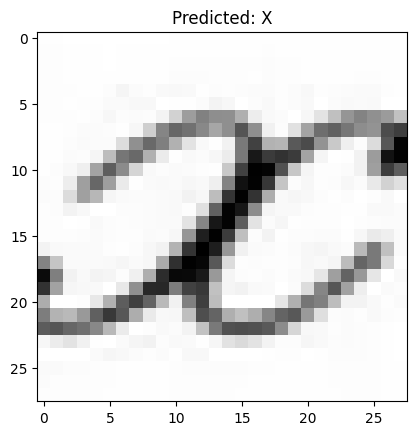

In [17]:
def load_and_preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.resize((28, 28), Image.Resampling.LANCZOS)
        img = img.convert('L')
        img_array = np.array(img) / 255.0 
        return img_array.reshape(1, 28, 28, 1)

image_path = './testX.png'
test_image = load_and_preprocess_image(image_path)

model = tf.keras.models.load_model('my_model_first_CNN.h5')

predicted_probabilities = model.predict(test_image)
predicted_class = np.argmax(predicted_probabilities, axis=1)

class_names = {
    1: 'А', 2: 'Б', 3: 'В', 4: 'Г', 5: 'Д', 6: 'Е', 7: 'Ё', 8: 'Ж', 9: 'З',
    10: 'И', 11: 'Й', 12: 'К', 13: 'Л', 14: 'М', 15: 'Н', 16: 'О', 17: 'П',
    18: 'Р', 19: 'С', 20: 'Т', 21: 'У', 22: 'Ф', 23: 'Х', 24: 'Ц', 25: 'Ч',
    26: 'Ш', 27: 'Щ', 28: 'Ъ', 29: 'Ы', 30: 'Ь', 31: 'Э', 32: 'Ю', 33: 'Я'
}
predicted_class_name = class_names[predicted_class[0]]
print("Предсказанный класс:", predicted_class_name)

plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_class_name}")
plt.show()


**Выводы**

В результате проведенной работы были разработаны и сравнены три различные модели машинного обучения для распознавания текста на изображениях. Каждая из моделей продемонстрировала свои уникальные возможности и ограничения. Модель на основе сверточной нейронной сети (CNN) показала наилучшие результаты с точки зрения точности и обобщающей способности, что делает её предпочтительным выбором для большинства задач распознавания изображений.

Однако, рекуррентная нейронная сеть (LSTM), предназначенная для работы с последовательными данными, также показала значительные перспективы, особенно в задачах, где важно учитывать контекст или порядок элементов в данных. Это может быть особенно ценно при работе с рукописным текстом или в условиях, где изображения содержат последовательности символов.

Это исследование подтвердило, что выбор модели должен основываться не только на общей эффективности, но и на специфике прикладной задачи, требованиях к точности и скорости обработки. Дальнейшие работы могут включать оптимизацию существующих моделей, исследование новых архитектур и расширение набора данных для обучения, что позволит улучшить результаты и адаптировать систему под более широкий спектр задач.

Показ успешного распознавания новых образцов может служить основанием для внедрения модели в прикладные системы, например, в системы автоматического ввода данных, распознавания текста для помощи слепым и слабовидящим пользователям, или других приложений, где требуется автоматизация обработки изображений и текста.